### Proyecto Final Grupal HENRY

**ML_prepro**  
Pre procesamiento de datos para posterior utilización en los algoritmos de ML

**Autores:**

**Camino Federico**  
**Londero Walter**  
**Pizarro Hernan**  
**Urteaga Facundo**  
**Veron Cintia**   

**Resumen:** 

1.  **Carga de librerías y datos**
2.  **Tratamiento de categorías generales**
3.  **Tratamiento de categorías de locales**
4.  **Filtrado de categorías de locales y chequeo con otras fuentes**
5.  **Comportamiento de usuarios**
5.  **Guardar datos como .csv**

#### 1. Carga de librerías y datos

In [9]:
# Carga de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.

In [10]:
# Carga  de archivos

df_businessGOOGLE = pd.read_csv("business_ML.csv") # Negocios GOOGLE 7 datos
df_businessYELP = pd.read_csv("BusinesslistYELPML.csv") # 7 business_id
df_categoriasCA = pd.read_csv("categoriasCA.csv") # 3854 CAT de CA
df_metadatos = pd.read_csv("metadatos_ML.csv") # 18776 filas x 9 columnas
df_negociosciudad = pd.read_csv("negociosciudad.csv") # 18776 gmap_id
df_reviewsGoogle = pd.read_csv("reviewsGoogle_ML.csv") # 154586 reviews con  gmap_id
df_reviewsYELP = pd.read_csv("ReviewsYELP_ML.csv") # 216 reviews con business_id
df_user = pd.read_csv("user_ML.csv") # 207 usuarios
df_yelpCA = pd.read_csv("yelpCA.csv") # 3948 business_id


#### 2. Tratamiento de categorías generales

In [11]:
# Se estableceran las siguientes categorías: Auto, Beauty, Clothes, Health, Home, Food,
# Entertainment, Education, Services, Sports, Technology, Religion, Stores, Buildings.

# Esta clasificación es útil para el análisis posterior de calidad de usuarios. No confundir con las categorías de interfaz de usuario.

In [12]:
# Se definen palabras clave que se encuentran en la lista de palabras de la columna "category" de los locales, para poder realizar esta clasificación.

def generalize_category(category):
    auto_keywords = ["auto", "car", "gas station", "parking", "vehicle", "tire"]
    beauty_keywords = ["beauty", "hair", "nail", "cosmetic", "spa", "salon", "massage"]
    clothes_keywords = ["clothing", "shoe", "boutique", "fashion"]
    health_keywords = ["hospital", "clinic", "doctor", "pharmacy", "dental", "health", "medical", "nurse", "vet", "veterinary",'dentist']
    home_keywords = ["home", "furniture", "garden", "real estate", "property", "plumber", "electrician", "construction",'laundromat',"dry cleaner"]
    food_keywords = ["restaurant", "cafe", "bakery", "grocery", "supermarket", "food", "bar", "pub"]
    entertainment_keywords = ["theater", "cinema", "museum", "park", "zoo", "amusement", "casino",'art gallery']
    education_keywords = ["school", "university", "college", "library", "education", "learning", "academy"]
    services_keywords = ["bank", "insurance", "consulting", "lawyer", "attorney", "service", "repair", "maintenance", "laundry", "post office"]
    sports_keywords = ["gym", "fitness", "sport", "stadium", "arena", "athletic"]
    technology_keywords = ["it", "tech", "technology", "computer", "software", "hardware", "electronics", "telecom"]
    religion_keywords = ["synagogue", "church", "buddhist", "mosque","religious"]
    stores_keywords = ['liquor store','convenience store','Store','store','coffee shop','shopping mall','cell phone store','florist',"fabric store","shop",'jeweler']
    buildings_keywords = ['corporate office','apartment','condominium','hotel','store','coffee shop','shopping mall','cell phone store','florist',"fabric store","shop"]

    if isinstance(category, str):
        
        # Convertir la categoría a minúsculas para la comparación
        category_lower = category.lower()

        if any(keyword in category_lower for keyword in auto_keywords):
            return "Auto"
        if any(keyword in category_lower for keyword in beauty_keywords):
            return "Beauty"
        if any(keyword in category_lower for keyword in clothes_keywords):
            return "Clothes"
        if any(keyword in category_lower for keyword in health_keywords):
            return "Health"
        if any(keyword in category_lower for keyword in home_keywords):
            return "Home"
        if any(keyword in category_lower for keyword in food_keywords):
            return "Food"
        if any(keyword in category_lower for keyword in entertainment_keywords):
            return "Entertainment"
        if any(keyword in category_lower for keyword in education_keywords):
            return "Education"
        if any(keyword in category_lower for keyword in services_keywords):
            return "Services"
        if any(keyword in category_lower for keyword in sports_keywords):
            return "Sports"
        if any(keyword in category_lower for keyword in technology_keywords):
            return "Technology"
        if any(keyword in category_lower for keyword in religion_keywords):
            return "Religion"
        if any(keyword in category_lower for keyword in stores_keywords):
            return "Stores"
        if any(keyword in category_lower for keyword in buildings_keywords):
            return "Buildings"
        
        return "Other"
    
    return "Other"

# Aplicar la función al DataFrame
df_metadatos['general_category'] = df_metadatos['category'].apply(generalize_category)

In [13]:
# Exploramos las categorías. En "Other" se alojan aquellos locales que no pudieron ser clasificados
df_metadatos["general_category"].value_counts()

general_category
Food             3421
Other            2998
Stores           2181
Services         1888
Auto             1888
Beauty           1270
Home              865
Health            757
Clothes           754
Technology        720
Buildings         547
Religion          531
Entertainment     404
Education         344
Sports            208
Name: count, dtype: int64

In [14]:
# Filtrar el DataFrame donde general_category es igual a "Other"
filtered_df = df_metadatos[df_metadatos["general_category"] == "Other"]

# Contar los valores de la columna "category" en el DataFrame filtrado
category_counts = filtered_df["category"].value_counts()

# Mostrar los resultados
category_counts.head(10)

# Encontramos que la mayoría de las etiquetas de "Other" pueden despreciarse debido a la naturaleza, la variedad y la cantidad.

category
['Bus stop']                       282
['Historical landmark']             65
['Smog inspection station']         64
['Association or organization']     53
['ATM']                             49
['Recording studio']                46
['Bus station']                     42
['Airline']                         38
['Pet groomer']                     37
['Law firm']                        36
Name: count, dtype: int64

#### 3. Tratamiento de categorías de locales

In [15]:
# Se estableceran las siguientes categorías de elección con sus sub-categorías:

#     Restaurant: - Comida asiática
#                 - Comida latinoamericana
#                 - Comida europea
#                 - Comida norteamericana y fast food
#                 - Comida vegana y vegetariana

#     Religion:   - Protestanismo (cat 1)
#                 - Catolisismo (cat 2)
#                 - Judaísmo (cat 3)
#                 - Budismo (cat 4)
#                 - Islam (cat 5)
#     Recreation:
#                 - Arte, música, teatro, cine, bibliotecas (cat 1)
#                 - Clubes nocturnos (cat 2)
#                 - Salas de Bowling, pool, dardos, casino (cat 3)

# Se establece la categoría general de bienestar:

#     Bienestar: - Lugares públicos de esparcimiento
#                - Centros asistenciales de salud
#                - Estaciones policiales
#                - Estaciones de bomberos
#                - Gimnasios y centros de actividad física
#                - Farmacias

In [16]:
# Funciones para seleccionar categorías de restaurants a partir de etiquetas en categories

# Función para verificar y asignar res_asian
def categorize_res_asian(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Asian restaurant", "Vietnamese restaurant","Chinese restaurant", 
                                                     "Sushi restaurant", "Ramen restaurant", "Korean restaurant", 
                                                     "Japanese restaurant","Sushi takeaway","Chinese takeaway",
                                                     "Asian fusion restaurant", "Southeast Asian restaurant", "South Asian restaurant",
                                                     "Thai restaurant", "Korean barbecue restaurant"]):
            return 1
    return 0

# Función para verificar y asignar res_latin
def categorize_res_latin(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Mexican restaurant", "Tex-Mex restaurant","Mexican torta restaurant", 
                                                     "Taco restaurant", "Burrito restaurant", "Salvadoran restaurant", 
                                                     "South American restaurant","Latin American restaurant","Nuevo Latino restaurant",
                                                     "Pan-Latin restaurant", "Argentinian restaurant", "Brazilian restaurant",
                                                     "Colombian restaurant", "Venezuelan restaurant", "Peruvian restaurant",
                                                     "Central American restaurant"]):
            return 1
    return 0

# Función para verificar y asignar res_euro
def categorize_res_euro(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Greek restaurant", "Italian restaurant", "Northern Italian restaurant", 
                                                     "Southern Italian restaurant", "Spanish restaurant", "Mediterranean restaurant", 
                                                     "French restaurant","Modern French restaurant","Haute French restaurant",
                                                     "French steakhouse restaurant", "German restaurant", "British restaurant",
                                                     "Russian restaurant", "European restaurant", "Modern European restaurant"]):
            return 1
    return 0

# Función para verificar y asignar res_latin
def categorize_res_fast(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Fast food restaurant", "Hamburguer restaurant", "American restaurant", 
                                                     "Sandwich shop", "Pizza restaurant", "Pizza delivery", 
                                                     "Pizza takeout","Pizza takeaway","Hot dog restaurant",
                                                     "Hot dog stand", "Chicken wings restaurant", "Chicken restaurant",
                                                     "Fried Chicken takeaway", "Barbecue restaurant", "Salad shop"]):
            return 1
    return 0

# Función para verificar y asignar res_latin
def categorize_res_vegan(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Vegan restaurant", "Salad shop", "Vegetarian restaurant", 
                                                     "Vegetarian cafe and deli"]):
            return 1
    return 0

In [17]:
# Aplicar la función a cada fila

df_metadatos["res_asian"] = df_metadatos["category"].apply(categorize_res_asian)
df_metadatos["res_latin"] = df_metadatos["category"].apply(categorize_res_latin)
df_metadatos["res_euro"] = df_metadatos["category"].apply(categorize_res_euro)
df_metadatos["res_fast"] = df_metadatos["category"].apply(categorize_res_fast)
df_metadatos["res_vegan"] = df_metadatos["category"].apply(categorize_res_vegan)


In [18]:
# Funciones para seleccionar categorías de religion. Se separan en 5 categorías religiosas a partir de un estudio de los grupos religiosos
# mayoritarios en la zona. Se definen: protestanismo, catolicismo, judaísmo, budismo e islamismo

# Función para verificar y asignar rel_pro
def categorize_rel(categories):
    if isinstance(categories, str):
        
        if any(keyword in categories for keyword in ["Gospel church", "Reformed church", "Foursquare church",
                                                     "Church of the Nazarene", "Apostolic church", "Evangelical church", 
                                                     "Assemblies of God church", "Calvary Chapel church", "Pentecostal church", 
                                                     "Methodist church", "Church of Christ", "Non-denominational church", 
                                                     "Presbyterian church", "Lutheran church", "Baptist church", 
                                                     "Christian church", "Protestant church"]):
            return 1
        
        if any(keyword in categories for keyword in ["Catholic church", "Cathedral","Catholic Cathedral"]):
            return 2

        if any(keyword in categories for keyword in ["Synagogue", "Orthodox synagogue","Reform synagogue",
                                                     "Conservative synagogue","Messianic synagogue"]):
            return 3

        if any(keyword in categories for keyword in ["Buddhist temple"]):
            return 4

        if any(keyword in categories for keyword in ["Mosque"]):
            return 5

    return 0


In [19]:
# Aplicar la función a cada fila

df_metadatos["religion"] = df_metadatos["category"].apply(categorize_rel)

In [20]:
# Funciones para seleccionar categorías de recreacion

# Función para verificar y asignar rel_pro

def categorize_rec(categories):
    if isinstance(categories, str):
        
        if any(keyword in categories for keyword in ["Performing arts theater", "Movie theater", "Amphitheater",
                                                     "Drama theater", "Outdoor movie theater", "Drive-in movie theater", 
                                                     "Ballet theater", "Live music venue", "Live music bar", 
                                                     "Musical club", "Public library"]):
            return 1
        
        if any(keyword in categories for keyword in ["Night club", "Disco club","Dance hall", 
                                                     "Pub", "Brewpub", "Gastropub", "Irish pub"]):
            return 2

        if any(keyword in categories for keyword in ["Bowling alley", "Sports bar","Pool hall",
                                                     "Pool billard club","Video arcade", "Dart bar",
                                                     "Casino"]):
            return 3
        
    return 0

In [21]:
# Aplicar la función a cada fila
df_metadatos["recreation"] = df_metadatos["category"].apply(categorize_rec)

In [22]:
# Funciones para seleccionar categorías de bienestar

# Función para verificar y asignar bien
def categorize_bien(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Public beach", "public swimming pool", "Public educational institution",
                                                      "Medical center", "Medical clinic", "Hospital",
                                                      "General hospital", "Fire station", "Police department",
                                                      "Police station", "State police", "Civil police",
                                                      "Park", "Gym", "Pharmacy", "Fitness center"]):
            return 1
    return 0

In [23]:
# Aplicar la función a cada fila

df_metadatos["bienestar"] = df_metadatos["category"].apply(categorize_bien)

In [24]:
# Mostrar las primeras filas del DataFrame

df_metadatos["recreation"].value_counts()

recreation
0    18468
2      145
1      137
3       26
Name: count, dtype: int64

#### 4. Filtrado de categorías de locales y chequeo con otras fuentes

In [25]:
# Lista de columnas a verificar
columns_to_check = ['res_asian', 'res_euro', 'res_latin', 'res_fast', 'res_vegan', 'religion', 'recreation', 'bienestar']

# Filtrar el DataFrame
df_metadatos_filtered = df_metadatos[df_metadatos[columns_to_check].any(axis=1)]

In [26]:
df_metadatos_filtered.info() # De 18776 a 2814

# Esto significa que de las 18776 ubicaciones quedan 2814 para el algoritmo

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 1 to 18775
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           2814 non-null   object 
 1   gmap_id           2814 non-null   object 
 2   latitude          2814 non-null   float64
 3   longitude         2814 non-null   float64
 4   category          2814 non-null   object 
 5   avg_rating        2814 non-null   float64
 6   num_of_reviews    2814 non-null   int64  
 7   Hours_day         2814 non-null   int64  
 8   Hours_night       2814 non-null   int64  
 9   general_category  2814 non-null   object 
 10  res_asian         2814 non-null   int64  
 11  res_latin         2814 non-null   int64  
 12  res_euro          2814 non-null   int64  
 13  res_fast          2814 non-null   int64  
 14  res_vegan         2814 non-null   int64  
 15  religion          2814 non-null   int64  
 16  recreation        2814 non-null   int64  
 17 

In [27]:
# Obtener los "gmap_id" únicos de df_metadatos_filtered
gmap_ids_filtered = df_metadatos_filtered['gmap_id'].unique()

# Filtrar df_reviewsGoogle
df_reviewsGoogle_filtered = df_reviewsGoogle[df_reviewsGoogle['gmap_id'].isin(gmap_ids_filtered)]

In [28]:
df_reviewsGoogle_filtered.info() # De 154586 a 52407

# Esto significa que de las 154586 reviews quedan 52407 para el algoritmo

<class 'pandas.core.frame.DataFrame'>
Index: 52407 entries, 0 to 154443
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  52407 non-null  float64
 1   time     52407 non-null  int64  
 2   rating   52407 non-null  int64  
 3   gmap_id  52407 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ MB


In [29]:
# Conversión de la variable temporal

df_reviewsGoogle_filtered['date'] = pd.to_datetime(df_reviewsGoogle['time'], unit='ms')
df_reviewsGoogle_filtered

,user_id,time,rating,gmap_id,date
0,1.089912e+20,1609909927056,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-01-06 05:12:07.056
1,1.112903e+20,1612849648663,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-02-09 05:47:28.663
2,1.126404e+20,1583643882296,4,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020-03-08 05:04:42.296
3,1.174403e+20,1551938216355,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019-03-07 05:56:56.355
4,1.005808e+20,1494910901933,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017-05-16 05:01:41.933
...,...,...,...,...,...
154439,1.064552e+20,1563494706323,5,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-07-19 00:05:06.323
154440,1.164411e+20,1560529465601,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-06-14 16:24:25.601
154441,1.011934e+20,1571624221742,4,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-10-21 02:17:01.742
154442,1.100051e+20,1555389818932,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-04-16 04:43:38.932


#### 5. Tratamiento de usuarios

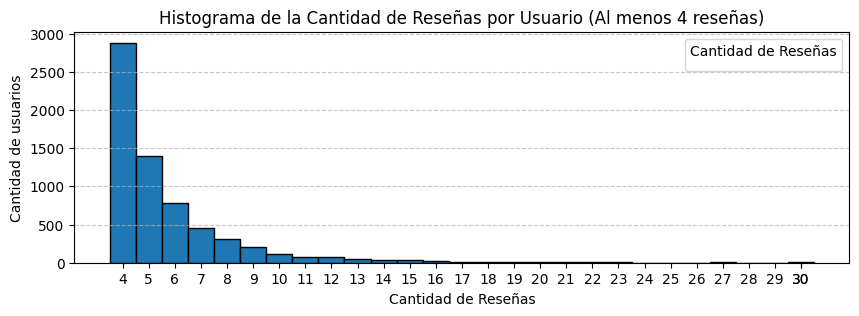

In [30]:
# Contar la cantidad de reseñas por user_id
reviews_count = df_reviewsGoogle['user_id'].value_counts()

# Filtrar los usuarios con más de 4 reseñas
filtered_reviews_count = reviews_count[reviews_count > 3]

# Limitar la cantidad de reseñas a un máximo de 30 para agrupar en el histograma
filtered_reviews_count_clipped = filtered_reviews_count.clip(upper=30)

# Crear el histograma
plt.figure(figsize=(10, 3))
plt.hist(filtered_reviews_count_clipped, bins=list(range(4, 31)) + [31], edgecolor='black', align='left')
plt.title('Histograma de la Cantidad de Reseñas por Usuario (Al menos 4 reseñas)')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Cantidad de usuarios')
plt.xticks(list(range(4, 31)) + [30])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir leyenda
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = list(range(4, 30)) + ['30+']
plt.legend(handles, custom_labels, title="Cantidad de Reseñas")

# Mostrar el histograma
plt.show()

In [32]:
# Guardar los dataframes modificados hasta el momento para la posterior etapa de ML

# Guardar df_metadatos_filtered como un archivo CSV
df_metadatos.to_csv('postpro_df_metadatos.csv', index=False)

# Guardar df_metadatos_filtered como un archivo CSV
df_reviewsGoogle.to_csv('postpro_df_reviewsGoogle.csv', index=False)

# Guardar df_metadatos_filtered como un archivo CSV
df_metadatos_filtered.to_csv('postpro_df_metadatos_filtered.csv', index=False)

# Guardar df_metadatos_filtered como un archivo CSV
df_reviewsGoogle_filtered.to_csv('postpro_df_reviewsGoogle_filtered.csv', index=False)